### Exploratory Data Analysis
Using the cleaned version data scraped from *glassdoor.com*.
The data is in the `./data/processed/` folder

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
**Loading the Dataset**

In [2]:
df = pd.read_csv("./../data/processed/salary_data_cleaned.csv")

---
**Getting to know the data better**

In [3]:
print("Dataset of 3 rows:")
df.head(3)

Dataset of 3 rows:


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Revenue,Competitors,Job_State,Same_State,Company_Age,Python,R,Spark,AWS,Excel
0,Data Scientist,72000,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,$50 to $100 million (USD),-1,NM,0,52,1,0,0,0,1
1,Healthcare Data Scientist,87500,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,$2 to $5 billion (USD),-1,MD,0,41,1,0,0,0,0
2,Data Scientist,85000,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,$100 to $500 million (USD),-1,FL,1,15,1,0,1,0,1


In [4]:
print("Existing Columns:")
df.columns

Existing Columns:


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Job_State', 'Same_State', 'Company_Age', 'Python', 'R', 'Spark', 'AWS',
       'Excel'],
      dtype='object')

---
---
**Feature Engineering**

Ensure the *job title* stays between `data scientist`, `data engineer`, `analyst`, `mle`, `manager`, `director` and `na`.
And, there's also a *level of seniority* defined between `senior`, `junior` and `na`.

In [5]:
def title_simplifier(title):
    # Convert title to lowercase for case-insensitive matching
    title_lower = title.lower()

    # Use a dictionary for mapping titles
    title_mapping = {
        'data scientist': 'data scientist',
        'data engineer': 'data engineer',
        'analyst': 'analyst',
        'machine learning': 'mle',
        'manager': 'manager',
        'director': 'director'
    }

    # Check for each pattern in the title
    for pattern, simplified_title in title_mapping.items():
        if pattern in title_lower:
            return simplified_title

    # Handle the case when no match is found
    return 'na'


def seniority(title):
    # Convert title to lowercase for case-insensitive matching
    title_lower = title.lower()

    # Dictionary mapping seniority levels to their various title indicators
    sr_mapping = {
        'senior': ['sr', 'senior', 'sr.', 'lead', 'principal'], # Keywords indicating senior positions
        'junior': ['jr', 'junior', 'jr.'] # Keywords indicating junior positions
    }

    # Iterate through each seniority level and its associated patterns
    for seniority, patterns in sr_mapping.items():
        # Check if any pattern exists in the title
        if any(pattern in title_lower for pattern in patterns):
            return seniority # Return the seniority level if a pattern matches
            
    # Return 'na' if no patterns match   
    return 'na' 
    

Applying the defined functions and make new features `job_simp` and `seniority`.

In [6]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)
df['seniority'] = df['Job Title'].apply(seniority)

Check out the new features.

In [7]:
print(df['job_simp'].value_counts(), "\n\n")
print(df['seniority'].value_counts())

job_simp
data scientist    268
na                154
data engineer     112
analyst           100
manager            22
mle                22
director           14
Name: count, dtype: int64 


seniority
na        486
senior    203
junior      3
Name: count, dtype: int64


---
Now,

Fixing the `Los Angeles` State.

In [8]:
#print(df.Job_State.value_counts())
df.loc[df.Job_State.str.strip() == 'Los Angeles', 'Job_State'] = 'CA'
#print(df.Job_State.value_counts())

---
Now, 

Creating a new feature based on the `length` of *Job Description*.

In [9]:
df['Desc_Len'] = df['Job Description'].apply(lambda x : len(x))
print(df.Desc_Len)

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
687    6162
688    6130
689    3078
690    1642
691    3673
Name: Desc_Len, Length: 692, dtype: int64


---
Now, 

Counting the competitor.

In [10]:
df['Num_Comp'] = df.Competitors.apply(lambda x: len(x.split(',')) if x != ('-1') else 0) 
print(df.Num_Comp.value_counts())

Num_Comp
0    419
3    221
2     39
1     12
4      1
Name: count, dtype: int64


---
---
**Non Graphical Descriptive Analysis**

In [11]:
#Stats of numerical columns
df.describe()

,Salary Estimate,Rating,Founded,Same_State,Company_Age,Python,R,Spark,AWS,Excel,Desc_Len,Num_Comp
count,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000
mean,101839.595376,3.674711,1861.183526,0.567919,52.562139,0.549133,0.002890,0.232659,0.235549,0.530347,3869.750000,1.093931
std,35629.387436,0.597762,452.388957,0.495724,55.101594,0.497940,0.053721,0.422832,0.424648,0.499439,1465.045415,1.395099
min,29500.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,75500.000000,3.300000,1942.750000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2826.750000,0.000000
50%,97500.000000,3.700000,1989.000000,1.000000,29.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3753.500000,0.000000
75%,122500.000000,4.000000,2007.000000,1.000000,64.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.750000,3.000000
max,254000.000000,5.000000,2019.000000,1.000000,281.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


---
---
### Making Histogram


<Axes: >

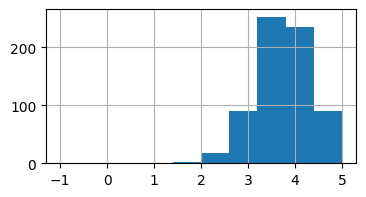

In [12]:
#Ratings of the companies
plt.figure(figsize=(4, 2))
df.Rating.hist()

<Axes: >

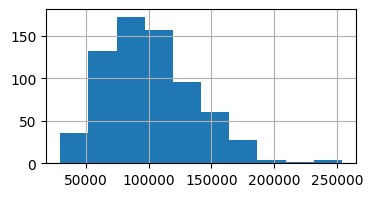

In [13]:
#Average Salary
plt.figure(figsize=(4, 2))
df['Salary Estimate'].hist()


<Axes: >

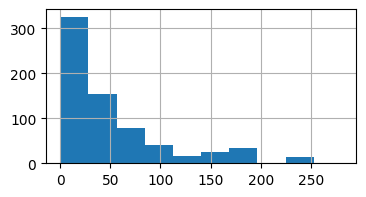

In [14]:
#Company Age
plt.figure(figsize=(4, 2))
df["Company_Age"].hist()

<Axes: >

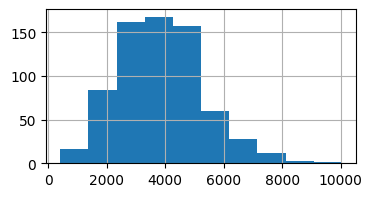

In [15]:
#Length of Job Description
plt.figure(figsize=(4, 2))
df["Desc_Len"].hist()

---
---
### Making Box Plot

<Axes: >

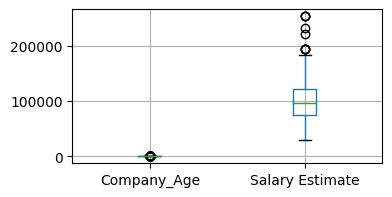

In [16]:
#Company Age and average salary
plt.figure(figsize=(4, 2))
df.boxplot(column=["Company_Age", "Salary Estimate"])

---
---
### Correlation Analysis

In [17]:
#Textual Correlation between age, average salary, rating and description length
df[['Company_Age', 'Salary Estimate', 'Rating', 'Desc_Len']].corr()

,Company_Age,Salary Estimate,Rating,Desc_Len
Company_Age,1.000000,0.048863,-0.051818,0.182749
Salary Estimate,0.048863,1.000000,0.093382,0.086008
Rating,-0.051818,0.093382,1.000000,-0.082398
Desc_Len,0.182749,0.086008,-0.082398,1.000000


---
**Correlation using Seaborn Heatmap**

<Axes: >

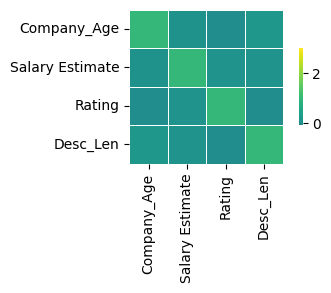

In [18]:
plt.figure(figsize=(4, 2))
#Set color
cmap = "viridis"
#Heatmap
sns.heatmap(df[['Company_Age', 'Salary Estimate', 'Rating', 'Desc_Len']].corr(), vmax=3, center=0, cmap=cmap,
            square=True, linewidth=.5, cbar_kws={"shrink":.5})

---
---
### Categorical Variable Analysis

In [63]:
#Getting categorical columns
df_cat = df.select_dtypes(include=['object', 'category']).copy()
#df_cat.head()

---
**Bar Chart for each of the categorical columns**

Graph for 'Company Name' column, total = 20 unique value(s)


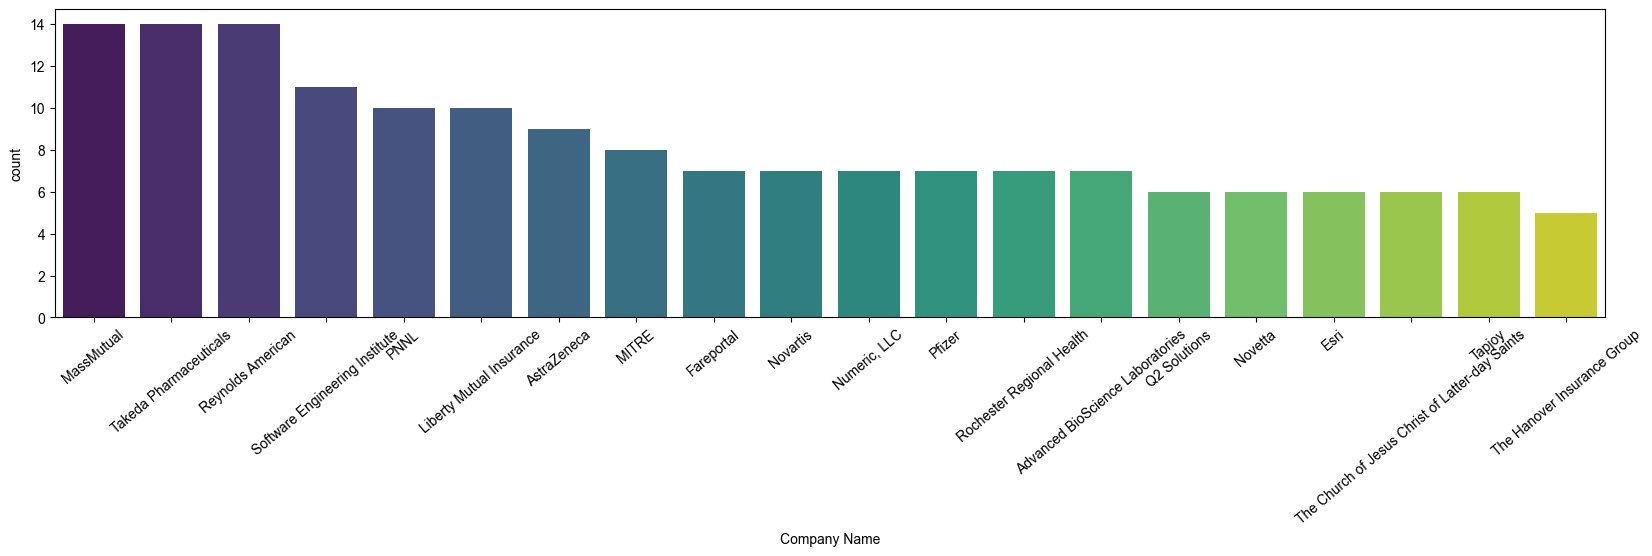

Graph for 'Location' column, total = 20 unique value(s)


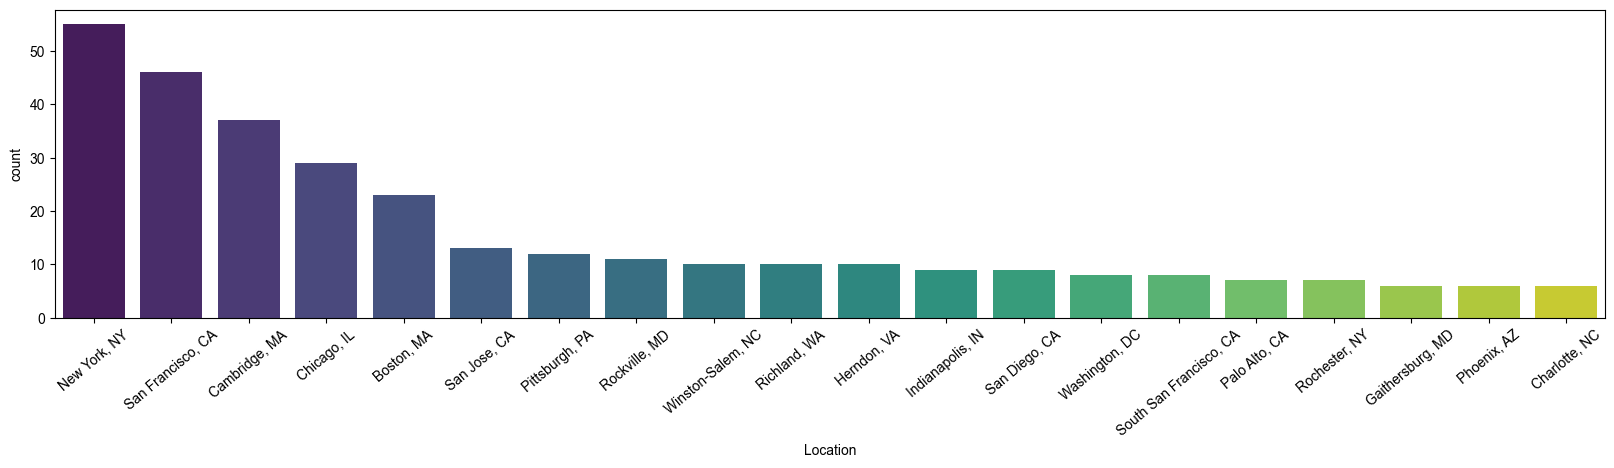

Graph for 'Headquarters' column, total = 20 unique value(s)


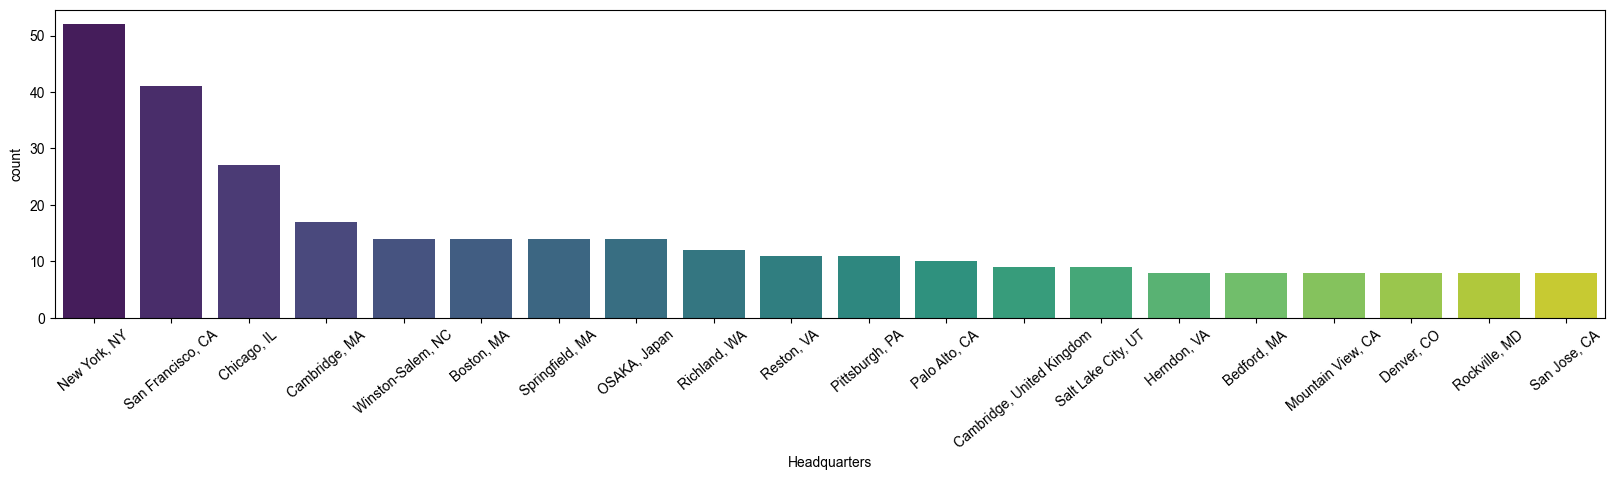

Graph for 'Size' column, total = 8 unique value(s)


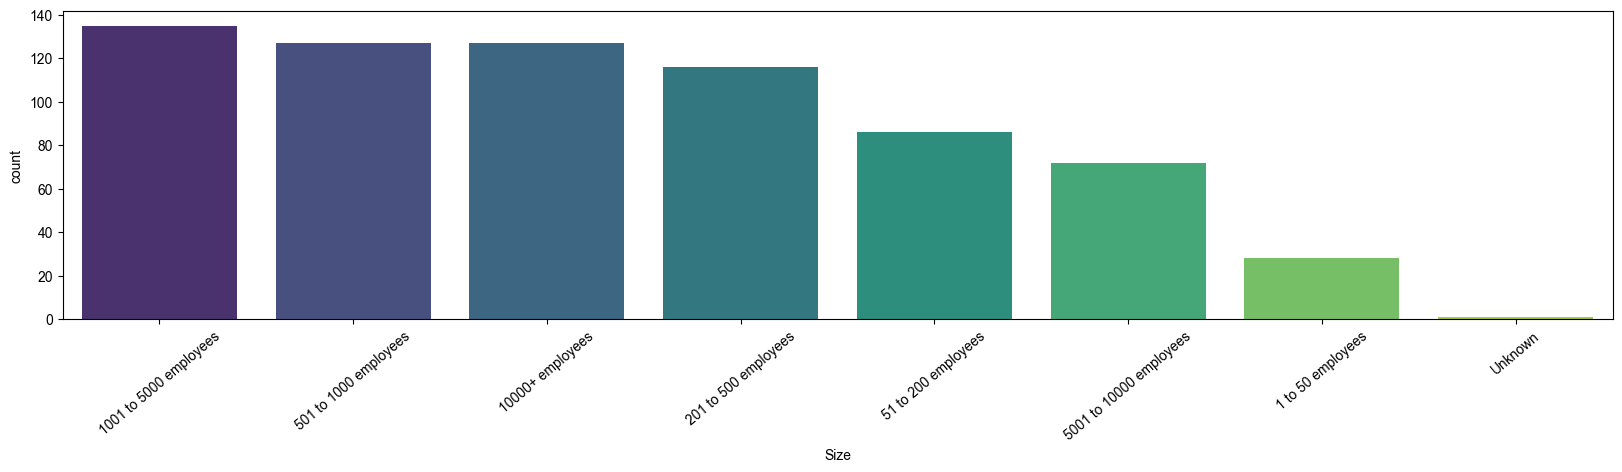

Graph for 'Type of ownership' column, total = 10 unique value(s)


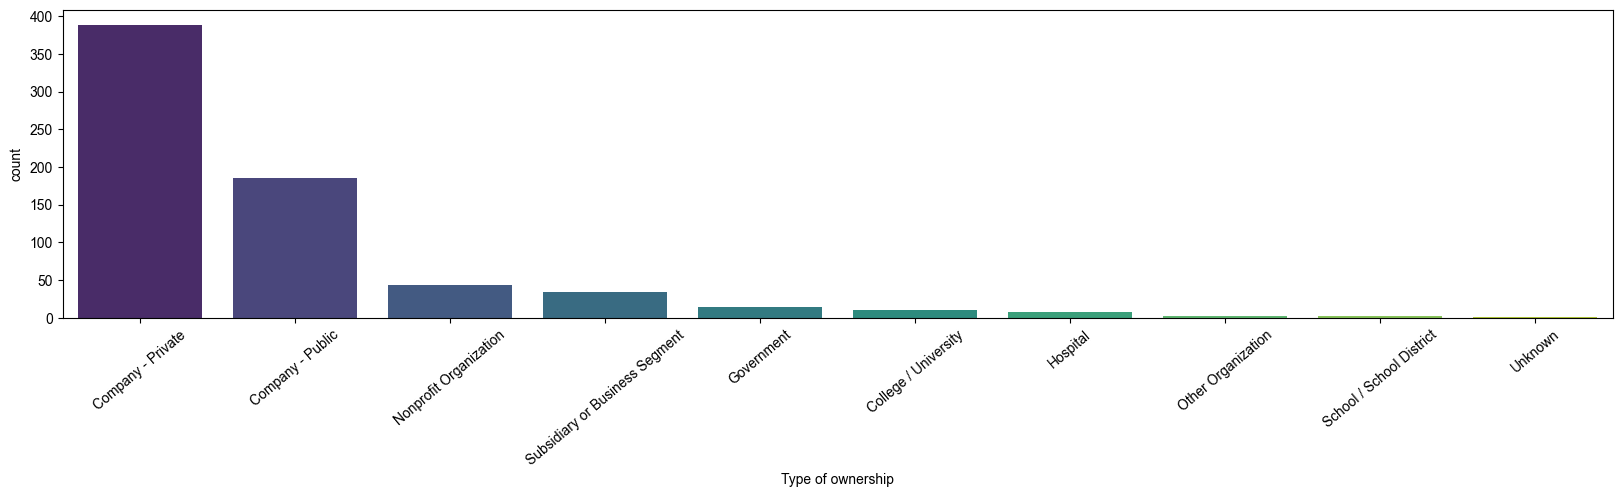

Graph for 'Industry' column, total = 20 unique value(s)


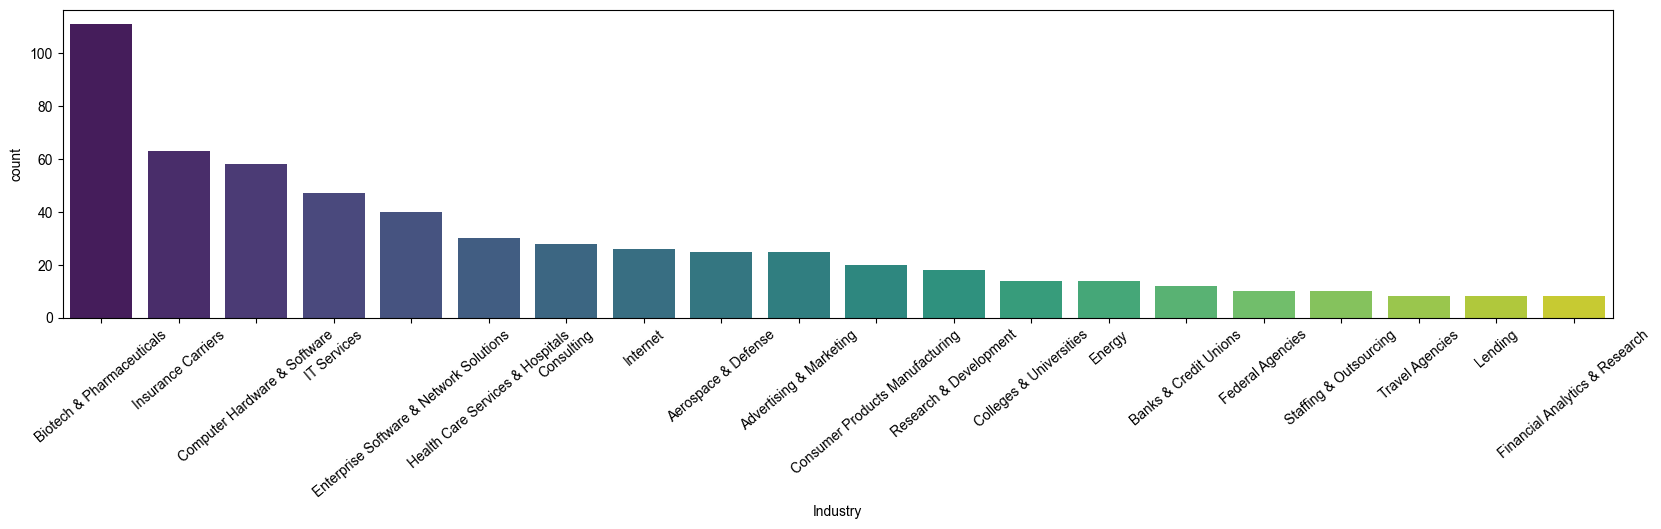

Graph for 'Sector' column, total = 20 unique value(s)


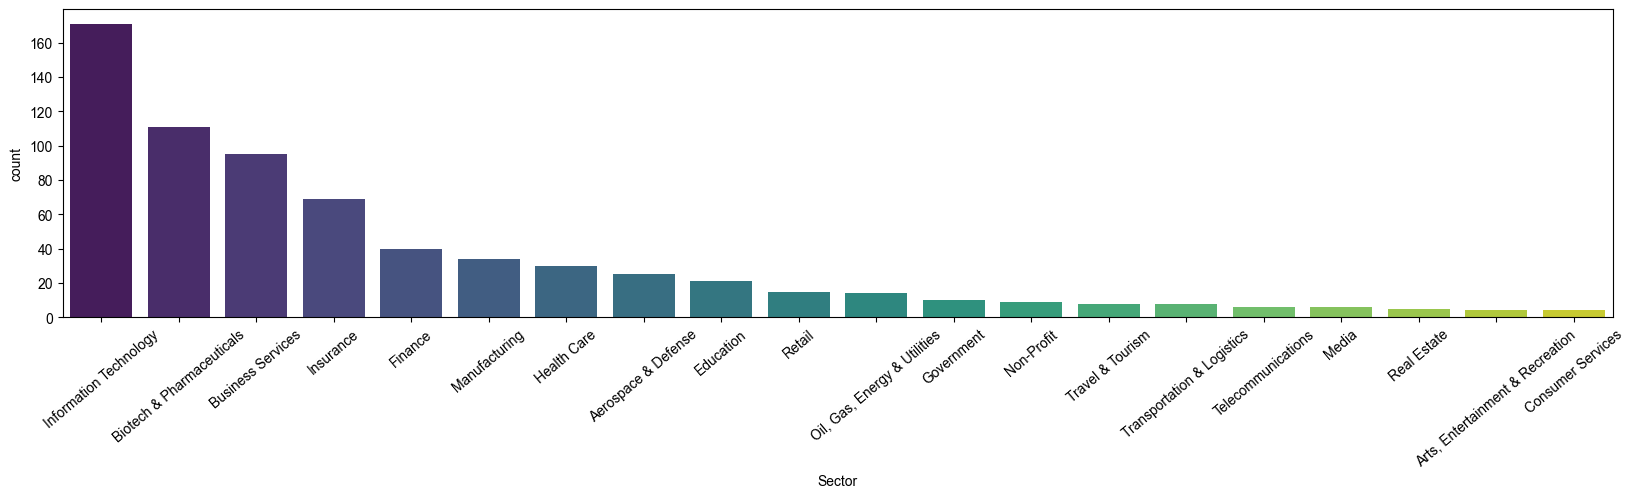

Graph for 'Revenue' column, total = 13 unique value(s)


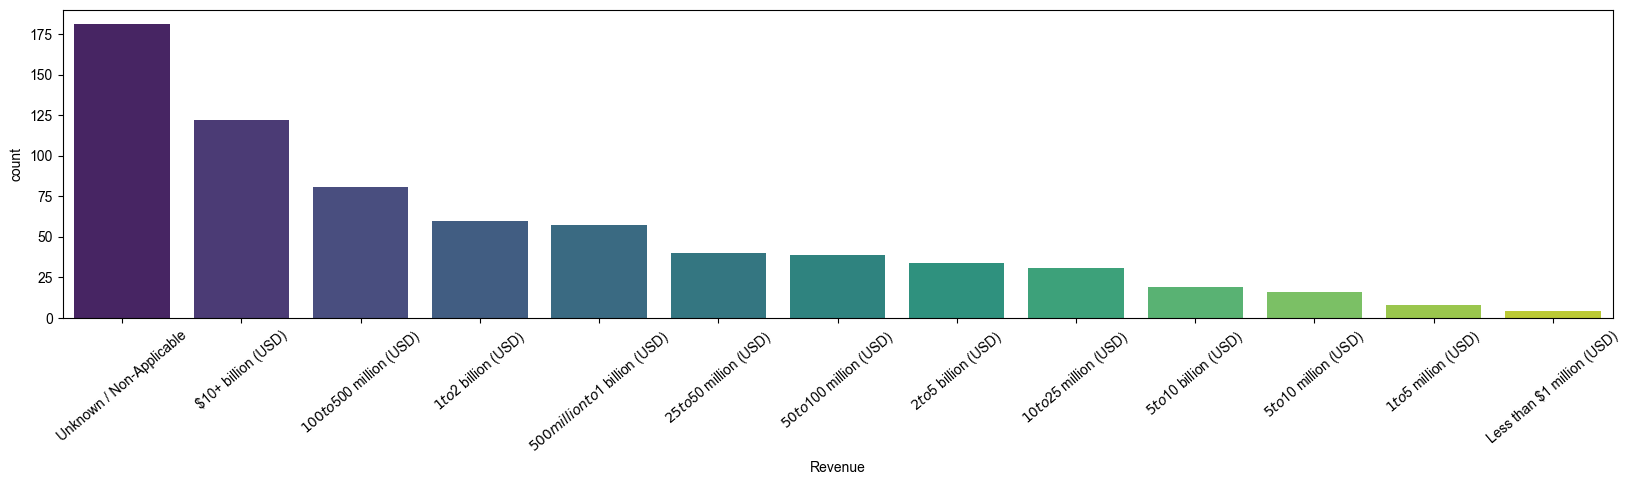

Graph for 'Job_State' column, total = 20 unique value(s)


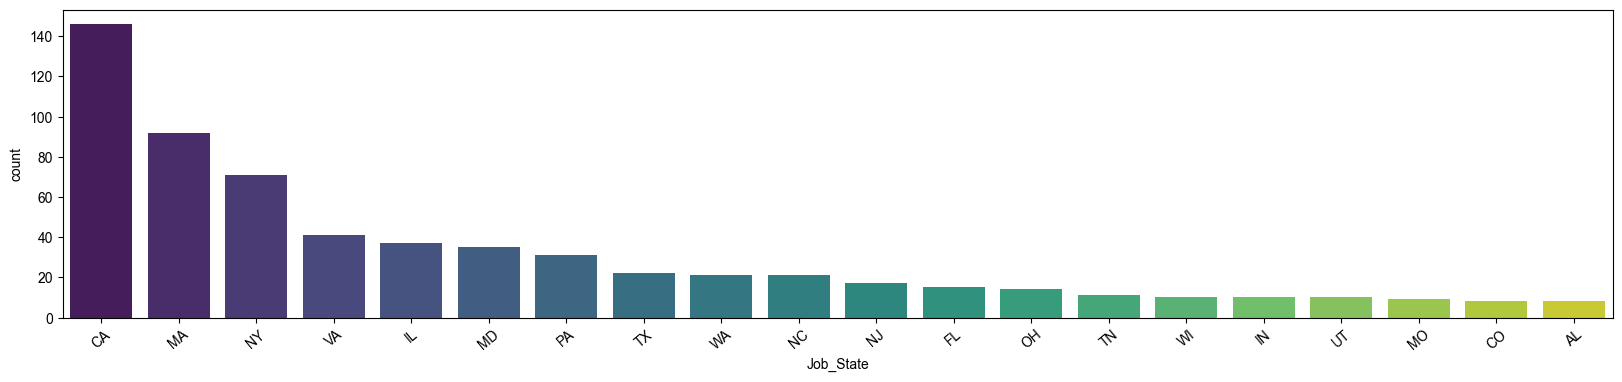

Graph for 'job_simp' column, total = 7 unique value(s)


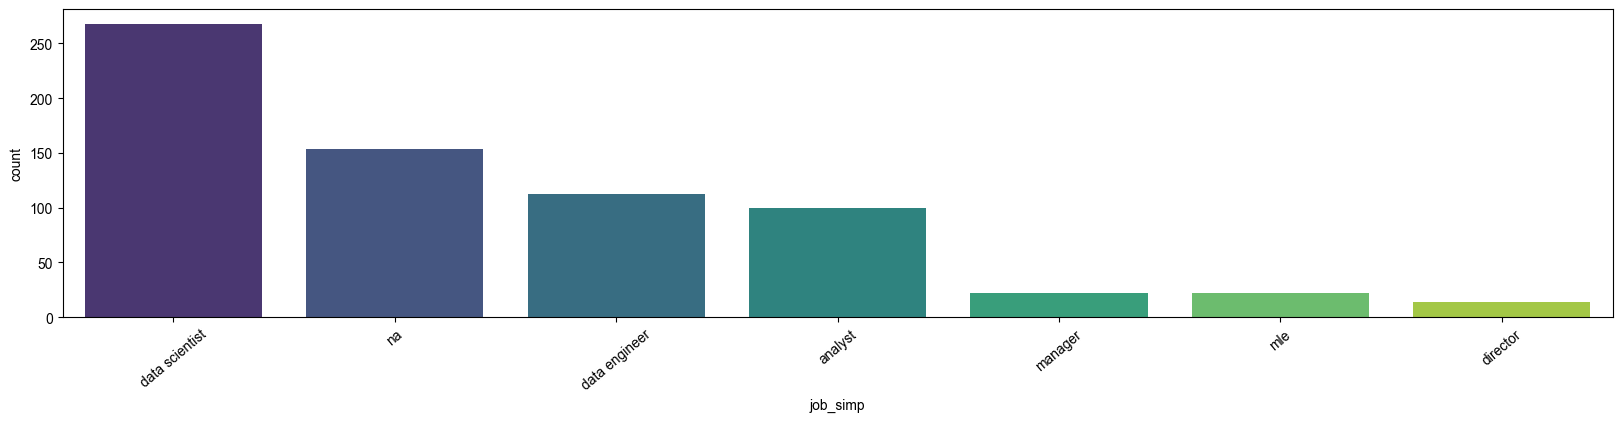

Graph for 'seniority' column, total = 3 unique value(s)


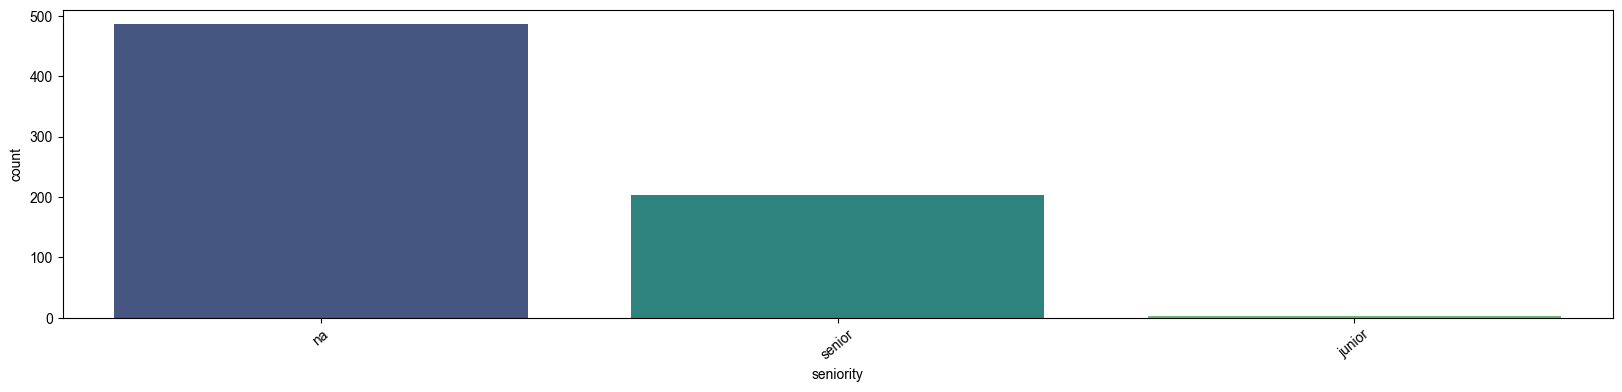

In [64]:
#As there are many unique values for some column, which will be hard to put on a graph,
#so we can either choose the column with less than certain threshold (Approach 1) Or
#Sort the value_counts in descending and pick top few rows (Approach 2)

#Also, dropping some unusal column
df_cat.drop(columns=['Job Title', 'Job Description', 'Competitors'], inplace=True) #If run once, the columns will be dropped, comment this line of code to run more than once

for column in df_cat.columns:


    #Approach 1
    '''
    if len(y := df_cat[column].value_counts()) > 15:  #Walrus operator
        continue
    '''
    #Approach 2
    y = df_cat[column].value_counts().sort_values(ascending=False)[:20]
    
    #FigSize and font for graphing
    plt.figure(figsize=(20, 4))
    # Set the font here:
    plt.rcParams['font.family'] = 'Arial'
    
    #Graphing
    print(f"Graph for '{column}' column, total = {len(y)} unique value(s)")
    chart = sns.barplot(x=y.index, y=y, hue=y.index, palette="viridis")
    chart.set_xticks(range(len(y.index)))  # Set ticks at the center of the bars
    chart.set_xticklabels(chart.get_xticklabels(), rotation= 40)
    plt.show()


---
---
### Pivot Tables

---
***Average Salary by Simplified job title***

In [71]:
pivot = pd.pivot_table(df, index='job_simp', values='Salary Estimate') #will show the average (mean, by default) salary estimate for each unique job post. To sum all the values for each unique index use parameter (aggfunc='sum')
pivot.sort_values(by="Salary Estimate", ascending=False) #Sorting the table

,Salary Estimate
job_simp,
director,168607.142857
mle,126431.818182
data scientist,116367.537313
data engineer,102705.357143
na,91574.675325
manager,84022.727273
analyst,66905.000000


---
***Average Salary by Simplified job title and Seniority***

In [76]:
#For multiple index - Pivot Table
pivot = pd.pivot_table(df, index=['job_simp', 'seniority'], values='Salary Estimate') #will show the average (mean, by default) salary estimate for each unique job post. To sum all the values for each unique index use parameter (aggfunc='sum')
pivot

Salary Estimate
job_simp       seniority                 
analyst        junior        53250.000000
               na            61308.219178
               senior        84340.000000
data engineer  na            96306.250000
               senior       118703.125000
data scientist junior       106500.000000
               na           107035.911602
               senior       136122.093023
director       na           168607.142857
manager        na            84022.727273
mle            na           119133.333333
               senior       142071.428571
na             na            82633.663366
               senior       108613.207547

---
***Average Salary by Job State***

In [77]:
pd.pivot_table(df, index=['Job_State'], values='Salary Estimate').sort_values(by="Salary Estimate", ascending=False)

,Salary Estimate
Job_State,
CA,120695.205479
IL,116594.594595
MA,108483.695652
NJ,104558.823529
TN,100500.000000
TX,100272.727273
RI,100000.000000
NY,99823.943662
NC,98452.380952
